# Homework 6: Simulating the Ising model

**Due Thursday, February 28**  

Lizeth D. Romo

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above
- Cite any resources that you used while working on this homework
- 1.a. Fill in the code to randomize the initial configuration
- 1.b. Test the code from 1.a
- 1.c. Fill in the code to choose a spin at random
- 1.d. Test the code from 1.c
- 1.e. Fill in the code to compute change in energy
- 1.f. Test the code from 1.e  
- 2. Fill in the code to complete the MC simulation  
- 3.a. Run the simulation at high temperature  
- 3.b. Plot the animation at high temperature  
- 3.c. Run the simulation at low temperature
- 3.d. Plot the animation at low temperature  
- 3.e. Interpret your results

## Discussion

In [lecture 12](https://github.com/Physics177-2019/lecture-12) we introduced the [Ising model](https://en.wikipedia.org/wiki/Ising_model). In [lecture 14](https://github.com/Physics177-2019/lecture-14) we talked about how to practically implement a [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) algorithm, using the 2D Ising model as an example. In this homework we will complete this exercise and use MCMC to study the 2D Ising model.

As a reminder, the Ising model describes a set of spins arranged on a lattice. In two dimensions, the configuration is described by a collection of spin variables $\sigma_{i,j}\in\{-1,1\}$, with $i,j = 1, 2, \ldots, N$. Here the energy of a configuration is
$$ 
E(\underline{\sigma}) = -\sum_{i=1}^{N}\sum_{j=1}^{N} J \left(\sigma_{i,j}\,\sigma_{i+1,j} + \sigma_{i,j}\,\sigma_{i,j+1}\right)\,.
$$

The coupling $J$ tells us how strong the interaction is between two neighboring spins. Here we'll assume periodic boundary conditions, so that the $(N+1)$th spin index is equal to $1$ -- in other words, $\sigma_{N+1,j}=\sigma_{1,j}$ and $\sigma_{i,N+1}=\sigma_{i,1}$.

## 1. Building the simulation step by step

Monte Carlo simulation of a system such as this one usually can't be performed in just a few lines. We'll make our work simpler by writing down the things that our program needs to do, and then writing a function to execute each one of those things.

In general, the steps are:

1. Prepare an initial configuration of the system  
2. Iterate Monte Carlo  
    a. Randomly choose a spin to flip  
    b. Compute the change in energy if the spin flips  
    c. Draw a random number and choose whether or not the spin flips  
    d. Update and save the configuration  
3. Analyze and visualize the results  

### 1.a. Set up the initial configuration

Let's call our configuration `s`. As in the previous lecture, we'll make `s` a `numpy` array. This time, we'll choose a larger system size, $N=20$. And, rather than starting in a configuration with the spins all the same, we'll start with them in a random orientation. 

Fill in the code below to define a function, `initialize_spins`, that takes a configuration as input and returns the spins in a random orientation.

In [0]:
import numpy as np
import numpy.random as rng

# Define the configuration

N = 20
s = np.ones((N, N)) # right now, they are all ones!


# Now write the function to randomize the configuration

def initialize_spins(s):
    """ 
    Takes an input configuration 's' and sets each spin to be 
        +1 with probability 1/2, or
        -1 with probability 1/2
    and returns the result
    """
    
    # Iterate through all the entries of s
    s_values = [-1,1]
    s_prob = [1/2, 1/2]
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i,j] = np.random.choice(s_values,p = s_prob)
            # < Your code here! >
            # Set s[i, j] to +1 or -1 with probability 1/2
            # Hint: one way to do this is with the numpy.random.choice function,
            # see the notebook from lecture 9 for an example
            
    # Return the result
    
    return s

### 1.b. Test `initialize_spins`

Execute the code block below to test your function. If it works properly, you should see a $20\times20$ array of numbers that are equal to $\pm 1$, with about an even number of positive and negative spins.

In [0]:
# Define the configuration

N = 20
s = np.ones((N, N))

# Randomize it

s = initialize_spins(s)

# And print the results

print('The dimension of the configuration array is {}'.format(s.shape))
print('There are {} + spins and {} - spins'.format(np.sum(s==1), np.sum(s==-1)))
print('The configuration is:')
print(s)

The dimension of the configuration array is (20, 20)
There are 204 + spins and 196 - spins
The configuration is:
[[ 1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
   1. -1.]
 [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.
   1.  1.]
 [-1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.
  -1. -1.]
 [-1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1.
  -1. -1.]
 [-1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.
  -1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
   1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
  -1.  1.]
 [-1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.
  -1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.
   1.  1.]
 [-1. -1.  1.  1.  1.  1. -1.  1.  1.

### 1.c. Choose a random spin

Next, during each step of the MC algorithm we need to choose a spin at random, which we will attempt to flip.

Fill in the code below to define a function, `choose_spin`, that will select spin indices uniformly at random from the lattice.

In [0]:
def choose_spin():
    """
    Choose spin indices at random. 
    We assume that the lattice size N has already been defined.
    """
    
    # Choose i and j indices at random from [0, 1, ..., N-1]
    # Hint: see the example from lecture 14 for one way to do this!
    
    
    i = rng.choice(N)
    j = rng.choice(N)
    
    # And return them
    
    return i, j

### 1.d. Test `choose_spin`

Execute the code block below to test your function. If it works properly, you should see a nearly uniform distribution over the range from $\left[0, 1, \ldots, N-1\right]$.

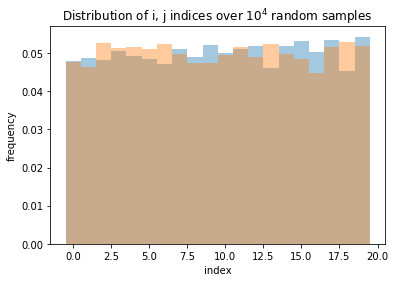

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

i_indices = []
j_indices = []

# Randomly sample a lot of i, j indices

for k in range(10**4):
    i, j = choose_spin()
    i_indices.append(i)
    j_indices.append(j)
    
# And check their distribution

sns.distplot(i_indices, bins=np.arange(0, N+1, 1), norm_hist=True, kde=False, hist_kws={'align':'left'}, label='i')
sns.distplot(j_indices, bins=np.arange(0, N+1, 1), norm_hist=True, kde=False, hist_kws={'align':'left'}, label='j')
plt.title(r'Distribution of i, j indices over $10^4$ random samples')
plt.xlabel('index')
plt.ylabel('frequency');

### 1.e. Compute the change in energy

The most important step we need to complete is to compute how the energy would change if we flipped a selected spin $\sigma_{i,j}$ to $-\sigma_{i,j}$. For example, if $\sigma_{i,j}=-1$, how would the energy change if we set $\sigma_{i,j}=1$ instead?

Fill in the code below to define a function `compute_delta_E` to compute the change in energy if the spin at position $(i, j)$ is flipped. We will assume that the coupling $J$ is already defined. Refer back to the Discussion for the energy expression. **Remember to account for periodic boundary conditions so that you don't overrun the configuration array!**

In [0]:
# Set the value of the coupling

J = 1


# Define the function to compute change in energy

def compute_delta_E(s, i, j):
    """
    Compute the change in the energy of the system if the value
    of the spin at index (i, j) is flipped.
    """
    
    delta_E = 2*J*s[i,j]*(s[(i-1)%N,j] + s[(i+1)%N,j]+ s[i, (j-1)%N] + s[i,(j+1)%N])
    
    # Hint: look back to lecture 14 if you are having trouble
    
    return delta_E

### 1.f. Test `compute_delta_E`

Execute the code block below to test your function. We'll prepare two special configurations and check to see if the computed $Delta E$ is the same as what we expect. If you don't get the expected result, return to 1.e. above to revise your function.

In [0]:
# Define the test configuration

N = 20
s = np.ones((N, N))


# And test compute_delta_E

dE = compute_delta_E(s, N-1, N-1)
if dE == 8:
    print('Success! Got delta_E = %.2f, expected delta_E = %.2f' % (dE, 8))
else:
    print('Test unsuccessful! Got delta_E = %.2f, expected delta_E = %.2f' % (dE, 8))

s[N-3,N-2] = -1
s[N-2,N-3] = -1

dE = compute_delta_E(s, N-2, N-2)
if dE == 0:
    print('Success! Got delta_E = %.2f, expected delta_E = %.2f' % (dE, 0))
else:
    print('Test unsuccessful! Got delta_E = %.2f, expected delta_E = %.2f' % (dE, 0))

Success! Got delta_E = 8.00, expected delta_E = 8.00
Success! Got delta_E = 0.00, expected delta_E = 0.00


## 2. Code the simulation

Now we've defined all the helper functions that we need to run our Monte Carlo simulation. Recall that our steps were

1. Prepare an initial configuration of the system  
2. Iterate Monte Carlo  
    a. Randomly choose a spin to flip  
    b. Compute the change in energy if the spin flips  
    c. Draw a random number and choose whether or not the spin flips  
    d. Update and save the configuration  
3. Analyze and visualize the results  

To choose whether or not the spin flips, we'll follow the [Metropolis rule](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm),

$$
P({\rm flip}) = \begin{cases} 
1 &\text{if }\Delta E < 0\\
e^{-\Delta E/T} &\text{if } \Delta E > 0
\end{cases} \,.
$$


Fill in the code below to execute these steps. We will put our Monte Carlo simulation code inside a function `MC_simulate` so that we can reuse it easily. Analysis and visualization will be in part 3 below. 

In [0]:
import numpy as np
import numpy.random as rng

def MC_simulate(T, n_steps):
    """
    This function runs a Monte Carlo simulation of the 2D Ising model
    and returns an array of n_steps configurations of the system.
    We assume that the system size N, the configuration array s, 
    and the coupling strength J are already defined.
    The temperature T and number of Monte Carlo steps n_steps are
    passed as parameters.
    """
    
    # Define global variables

    N = 20              # system size
    s = np.ones((N, N)) # configuration array
    J = 1               # coupling strength
    configs = []        # container for configurations
    
    # Randomize the starting configuration
    
    s = initialize_spins(s)
    
    # Begin MC simulation
    
    for _step in range(n_steps):
        
        # Record the current configuration
        
        configs.append(np.copy(s)) # NOTE: because this is a numpy array, we need to COPY it
        
        # Choose a random spin to attempt to flip
        
        i, j = choose_spin()
        
        # Compute the change in energy
        
        delta_E = compute_delta_E(s, i, j)
        
        # Check to see if the spin flips
        
        temp = s[i][j]
        
        if delta_E<0:
            s[i,j] *= -1
            # < Your code here! Energy is lowered, so we flip the spin at index (i, j). >
        
        elif rng.rand()<np.exp(-delta_E/T):
            s[i,j] *= -1
            # < Your code here! Energy is higher but check passes, so we flip the spin at index (i, j). >
    
    # Finally, return the stored configurations
    
    return configs

## 3. Analyze and visualize the results

### 3.a. The Ising model at high temperature

First, let's run a simulation at a temperature of $T=5$. We'll take $10^4$ Monte Carlo steps in our simulation. Fill in the code below to gather the simulation data and display it. We'll use some functions from `matplotlib` to make an [animation](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1) so that we can visualize how the configuration of the system changes!

**Note:** animation can be tricky, and the libraries needed to create animations are not as well standardized as other ones we've been using. **If this code fails**, you can either 1. troubleshoot the problem (for example, this might require installing a library like `ffmpeg`), or 2. proceed to **Problem X** below this one to produce the animations. If you choose the second option, make sure to return to part 3.e to reflect on the results.

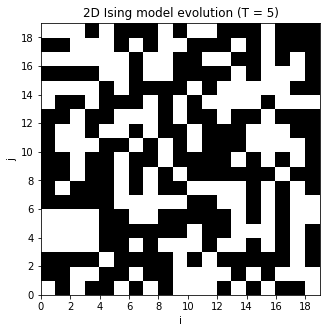

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gather the simulation data

configs = MC_simulate(5, 10000)


# Visualize the configurations!

xs, ys = np.meshgrid(range(N), range(N))
fig = plt.figure(figsize=(5,5))
plt.xlim(0, N-1)
plt.ylim(0, N-1)
plt.xticks(range(0,N,2))
plt.yticks(range(0,N,2))
plt.xlabel('i')
plt.ylabel('j')
plt.title('2D Ising model evolution (T = 5)')

writer = animation.writers['ffmpeg']
writer = writer(fps=20, metadata=dict(artist='Me'))

p = plt.pcolormesh(xs, ys, configs[0], cmap=plt.get_cmap('binary'))

def animate(i):
    p.set_array(configs[i].ravel())
    return p

anim_high = animation.FuncAnimation(fig, animate, frames=range(0, 10000, 10), interval=10)
anim_high.save('T=5.mp4', writer=writer)

### 3.b. Display the animation (high T)

The code above will create and save an animation of the evolution of the system. Execute the code block below to display the animation in the Jupyter notebook.

In [0]:
HTML(anim_high.to_html5_video())

### 3.c. The Ising model at low temperature

Next, let's run a simulation at a temperature of $T=1$. As before we'll take $10^4$ Monte Carlo steps. Fill in the code below to gather the simulation data and display it.

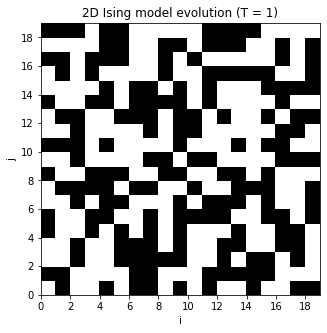

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gather the simulation data

configs = MC_simulate(1, 10000)


# Visualize the configurations!

xs, ys = np.meshgrid(range(N), range(N))
fig = plt.figure(figsize=(5,5))
plt.xlim(0, N-1)
plt.ylim(0, N-1)
plt.xticks(range(0,N,2))
plt.yticks(range(0,N,2))
plt.xlabel('i')
plt.ylabel('j')
plt.title('2D Ising model evolution (T = 1)')

writer = animation.writers['ffmpeg']
writer = writer(fps=20, metadata=dict(artist='Me'))

p = plt.pcolormesh(xs, ys, configs[0], cmap=plt.get_cmap('binary'))

def animate(i):
    p.set_array(configs[i].ravel())
    return p

anim_low = animation.FuncAnimation(fig, animate, frames=range(0, 10000, 10), interval=10)
anim_low.save('T=1.mp4', writer=writer)

### 3.d. Display the animation (low T)

Execute the code block below to display the evolution of the 2D Ising model at low temperature.

In [0]:
HTML(anim_low.to_html5_video())

### 3.e. Assessing the results

Compare your simulations at high and low temperatures. What differences do you observe? Can you explain the results?

We won't have time to discuss this in the class, but these simulations show a [phase transition](https://en.wikipedia.org/wiki/Phase_transition) in the 2D Ising model. The critical temperature $T_c$ for the phase transition is 

$$ T_c = \frac{2}{\log\left(1+\sqrt{2}\right)} \approx 2.27\,. $$

The simulation at high temperature is above $T_c$, in the disordered phase, and the simulation at low temperature is in the ordered phase below $T_c$.

Compare the simulations at high and low temperatures.

From the two simulations at the higer temperature, the model switches up and down throughout the plot. However, when T is lower temperature, the states went through some switches and eventually it would stopped switching when the states around each other are in the same state and stabalized.  


## X. If the animation code above fails...

Animation is particularly platform-dependent, and may be difficult to run smoothly. If the code in part 3 doesn't work, the approach below *should* still be all right.

### X.a. Save animation frames

First, we can scan through and save individual frames for each simulation. If necessary, fill in the code below to do this. Make sure to set the temperature! If the code in part 3 does not execute for you, **you'll need to do this twice**: once at high temperature and once at low temperature.

In [0]:
# Set the temperature

T = # FILL THIS IN!


# Import matplotlib

import matplotlib
import matplotlib.pyplot as plt


# Gather the simulation data

configs = MC_simulate(T, 10000) # < Your code here! Use the MC_simulate function you defined. >


# Visualize the configurations!

xs, ys = np.meshgrid(range(N), range(N))
fig = plt.figure(figsize=(5,5))
plt.xlim(0, N-1)
plt.ylim(0, N-1)
plt.xticks(range(0,N,2))
plt.yticks(range(0,N,2))
plt.xlabel('i')
plt.ylabel('j')
plt.title('2D Ising model evolution (T = %d)' % T)

for i in range(0, 10000, 100):
    plt.pcolormesh(xs, ys, configs[i], cmap=plt.get_cmap('binary'))
    plt.savefig('T=%d-%d.png' % (T, i//100))
    plt.clf()

### X.b. Stitch frames together into an animation

Execute the code block below to combine the individual frames into an animation. For this we'll use the `apng` package. You can install it by running `pip install apng` at the terminal/command line. After the package is installed, you'll need to restart the kernel to use it.

In [0]:
# Set the temperature

T = # FILL THIS IN!


# Import the package

from apng import APNG

filenames = ['T=%d-%d.png' % (T, i) for i in range(100)]
APNG.from_files(filenames, delay=100).save('T=%d.png' % T)

### X.c. Display the animation

**Edit this Markdown cell** to display your animation. In the line of code below, put in the proper value of T to display the image, after you've created it from X.a and X.b above.

<img src="T=1.png">

NameError: name 'np' is not defined